<a href="https://colab.research.google.com/github/cnmurakami/colab-analise-exploratoria-de-dados/blob/main/docs/tutorials/google/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

# Modifique o diretório para fazer a leitura dos dados em dados_banco.csv

# Dados banco - Leitura dos dados
# Caso necessário, leia a partir de um diretório da sua máquina
# dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0)

# Se usar o colab, faça o upload do arquivo dadso_banco.csv
viagem = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Viagem.csv', index_col=0, sep = ';', encoding='latin-1')
trecho = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Trecho.csv', index_col=0, sep = ';', encoding='latin-1')
passagem = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Passagem.csv', index_col=0, sep = ';', encoding='latin-1')
pagamento = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Pagamento.csv', index_col=0, sep = ';', encoding='latin-1')

In [ ]:
print("Dimensoes da tabela: {numlin} linhas x {numcol} columns".format(numlin=viagem.shape[0], numcol=len(viagem.columns)))

Dimensoes da tabela: 555191 linhas x 21 columns


In [ ]:
print("Dimensões do Data Frame:",viagem.shape)
print('')
viagem.info()

Dimensões do Data Frame: (555191, 21)

<class 'pandas.core.frame.DataFrame'>
Index: 555191 entries, 18831091 to 2024001455
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Número da Proposta (PCDP)      555191 non-null  object
 1   Situação                       555191 non-null  object
 2   Viagem Urgente                 555191 non-null  object
 3   Justificativa Urgência Viagem  555023 non-null  object
 4   Código do órgão superior       555191 non-null  int64 
 5   Nome do órgão superior         555191 non-null  object
 6   Código órgão solicitante       555191 non-null  int64 
 7   Nome órgão solicitante         555191 non-null  object
 8   CPF viajante                   474790 non-null  object
 9   Nome                           555191 non-null  object
 10  Cargo                          349867 non-null  object
 11  Função                         555191 non-null  object
 12 

In [ ]:
print("Dimensões do Data Frame:",trecho.shape)
print('')
trecho.info()

Dimensões do Data Frame: (1162837, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 1162837 entries, 18831091 to 2024001455
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Número da Proposta (PCDP)  1162837 non-null  object
 1   Sequência Trecho           1162837 non-null  int64 
 2   Origem - Data              1162837 non-null  object
 3   Origem - País              1162837 non-null  object
 4   Origem - UF                1139465 non-null  object
 5   Origem - Cidade            1162837 non-null  object
 6   Destino - Data             1162837 non-null  object
 7   Destino - País             1162837 non-null  object
 8   Destino - UF               1139631 non-null  object
 9   Destino - Cidade           1162837 non-null  object
 10  Meio de transporte         1162837 non-null  object
 11  Número Diárias             1162837 non-null  object
 12  Missao?                    1162837 non-

In [ ]:
print("Dimensões do Data Frame:",passagem.shape)
print('')
passagem.info()

Dimensões do Data Frame: (289115, 18)

<class 'pandas.core.frame.DataFrame'>
Index: 289115 entries, 19177818 to 2024001440
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Número da Proposta (PCDP)  289115 non-null  object
 1   Meio de transporte         289115 non-null  object
 2   País - Origem ida          289115 non-null  object
 3   UF - Origem ida            280510 non-null  object
 4   Cidade - Origem ida        289115 non-null  object
 5   País - Destino ida         289115 non-null  object
 6   UF - Destino ida           278623 non-null  object
 7   Cidade - Destino ida       289115 non-null  object
 8   País - Origem volta        289115 non-null  object
 9   UF - Origem volta          286436 non-null  object
 10  Cidade - Origem volta      289115 non-null  object
 11  Pais - Destino volta       289115 non-null  object
 12  UF - Destino volta         288515 non-null  object
 13 

In [ ]:
print("Dimensões do Data Frame:",pagamento.shape)
print('')
pagamento.info()

Dimensões do Data Frame: (907732, 9)

<class 'pandas.core.frame.DataFrame'>
Index: 907732 entries, 18831091 to 2024001455
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número da Proposta (PCDP)           907732 non-null  object 
 1   Código do órgão superior            907722 non-null  float64
 2   Nome do órgão superior              907732 non-null  object 
 3   Codigo do órgão pagador             907722 non-null  float64
 4   Nome do órgao pagador               907677 non-null  object 
 5   Código da unidade gestora pagadora  907732 non-null  int64  
 6   Nome da unidade gestora pagadora    907732 non-null  object 
 7   Tipo de pagamento                   907732 non-null  object 
 8   Valor                               907732 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 69.3+ MB


In [ ]:
dados.notnull().sum().rename('Not NULL')

,Not NULL
Número da Proposta (PCDP),555191
Situação,555191
Viagem Urgente,555191
Justificativa Urgência Viagem,555023
Código do órgão superior,555191
Nome do órgão superior,555191
Código órgão solicitante,555191
Nome órgão solicitante,555191
CPF viajante,474790
Nome,555191


In [ ]:
dados.isnull().sum().rename('NULL')

,NULL
Número da Proposta (PCDP),0
Situação,0
Viagem Urgente,0
Justificativa Urgência Viagem,168
Código do órgão superior,0
Nome do órgão superior,0
Código órgão solicitante,0
Nome órgão solicitante,0
CPF viajante,80401
Nome,0


In [ ]:
trecho.head()

,Número da Proposta (PCDP),Sequência Trecho,Origem - Data,Origem - País,Origem - UF,Origem - Cidade,Destino - Data,Destino - País,Destino - UF,Destino - Cidade,Meio de transporte,Número Diárias,Missao?
Identificador do processo de viagem,,,,,,,,,,,,,
18831091,000011/24,2,25/02/2024,Brasil,Acre,Rio Branco,25/02/2024,Brasil,Acre,Xapuri,Veículo Próprio,"0,50",Não
18831091,000011/24,1,23/02/2024,Brasil,Acre,Xapuri,25/02/2024,Brasil,Acre,Rio Branco,Veículo Próprio,"2,00",Sim
18831495,000001/24,2,22/01/2024,Brasil,São Paulo,São Paulo,22/01/2024,Brasil,Minas Gerais,Uberlândia,Aéreo,"0,00",Não
18831495,000001/24,1,18/01/2024,Brasil,Minas Gerais,Uberlândia,22/01/2024,Brasil,São Paulo,São Paulo,Aéreo,"0,00",Sim
18831777,000002/24,2,04/03/2024,Brasil,São Paulo,São Paulo,04/03/2024,Brasil,Minas Gerais,Uberlândia,Aéreo,"0,00",Não


In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.3 MB/s eta 0:00:00


In [3]:
import plotly.express as px
import pandas as pd
import pycountry

country_dict = {
    "afeganistão": "Afghanistan",
    "áfrica do sul": "South Africa",
    "albânia": "Albania",
    "alemanha": "Germany",
    "andorra": "Andorra",
    "angola": "Angola",
    "antígua e barbuda": "Antigua and Barbuda",
    "antártica": "Antarctica",
    "argélia": "Algeria",
    "arábia saudita": "Saudi Arabia",
    "argélia": "Algeria",
    "argentina": "Argentina",
    "armênia": "Armenia",
    "austrália": "Australia",
    "áustria": "Austria",
    "azerbaijão": "Azerbaijan",
    "azerbaidjão": "Azerbaijan",
    "bahamas": "Bahamas",
    "bahrein": "Bahrain",
    "bangladesh": "Bangladesh",
    "barbados": "Barbados",
    "bielorrússia": "Belarus",
    "bélgica": "Belgium",
    "belize": "Belize",
    "benin": "Benin",
    "birmânia": "Myanmar",
    "bósnia e herzegovina": "Bosnia and Herzegovina",
    "botsuana": "Botswana",
    #"brasil": "Brazil",
    "brunei": "Brunei",
    "bulgária": "Bulgaria",
    "burkina faso": "Burkina Faso",
    "burundi": "Burundi",
    "butão": "Bhutan",
    "bélgica": "Belgium",
    "cabo verde": "Cape Verde",
    "camboja": "Cambodia",
    "camarões": "Cameroon",
    "canadá": "Canada",
    "catar": "Qatar",
    "cazaquistão": "Kazakhstan",
    "chade": "Chad",
    "chile": "Chile",
    "china": "China",
    "chipre": "Cyprus",
    "colômbia": "Colombia",
    "comores": "Comoros",
    "congo": "Congo",
    "coreia do norte": "North Korea",
    "coreia do sul": "South Korea",
    "costa rica": "Costa Rica",
    "croácia": "Croatia",
    "cuba": "Cuba",
    "curaçau": "Curaçao",
    "chipre": "Cyprus",
    "dinamarca": "Denmark",
    "djibuti": "Djibouti",
    "dominica": "Dominica",
    "egito": "Egypt",
    "el salvador": "El Salvador",
    "emirados árabes unidos": "United Arab Emirates",
    "equador": "Ecuador",
    "eritreia": "Eritrea",
    "eslováquia": "Slovakia",
    "eslovênia": "Slovenia",
    "espanha": "Spain",
    "estados unidos": "United States",
    "estados unidos da américa": "United States",
    "estônia": "Estonia",
    "eswatini": "Eswatini",
    "etiópia": "Ethiopia",
    "fiji": "Fiji",
    "filipinas": "Philippines",
    "finlândia": "Finland",
    "frança": "France",
    "gabon": "Gabon",
    "gâmbia": "Gambia",
    "gana": "Ghana",
    "geórgia": "Georgia",
    "granada": "Grenada",
    "grécia": "Greece",
    "guatemala": "Guatemala",
    "guiana": "Guyana",
    "guiné": "Guinea",
    "guiné-bissau": "Guinea-Bissau",
    "guerra do líbano": "Lebanon",
    "grenada": "Grenada",
    "groelândia": "Greenland",
    "guiana francesa": "French Guiana",
    "guiné equatorial": "Equatorial Guinea",
    "gibraltar": "Gibraltar",
    "haiti": "Haiti",
    "honduras": "Honduras",
    "hungria": "Hungary",
    "iémen": "Yemen",
    "ilhas cayman": "Cayman Islands",
    "ilhas malvinas": "Falkland Islands",
    "ilhas marshall": "Marshall Islands",
    "ilhas pitcairn": "Pitcairn Islands",
    "ilhas salomão": "Solomon Islands",
    "índia": "India",
    "indonésia": "Indonesia",
    "irã": "Iran",
    "iraque": "Iraq",
    "irlanda": "Ireland",
    "islândia": "Iceland",
    "israel": "Israel",
    "itália": "Italy",
    "jamaica": "Jamaica",
    "japão": "Japan",
    "jordânia": "Jordan",
    "kazajistão": "Kazakhstan",
    "quênia": "Kenya",
    "kiribati": "Kiribati",
    "kosovo": "Kosovo",
    "kuwait": "Kuwait",
    "laos": "Laos",
    "lesoto": "Lesotho",
    "letônia": "Latvia",
    "líbano": "Lebanon",
    "libéria": "Liberia",
    "líbia": "Libya",
    "liechtenstein": "Liechtenstein",
    "lituânia": "Lithuania",
    "luxemburgo": "Luxembourg",
    "madagáscar": "Madagascar",
    "malawi": "Malawi",
    "maldivas": "Maldives",
    "mali": "Mali",
    "malta": "Malta",
    "mancomunidade das bahamas": "Bahamas",
    "marrocos": "Morocco",
    "maurício": "Mauritius",
    "mauritânia": "Mauritania",
    "méxico": "Mexico",
    "moçambique": "Mozambique",
    "moldávia": "Moldova",
    "mônaco": "Monaco",
    "montenegro": "Montenegro",
    "namíbia": "Namibia",
    "nauru": "Nauru",
    "nepal": "Nepal",
    "nicarágua": "Nicaragua",
    "níger": "Niger",
    "nigéria": "Nigeria",
    "noruega": "Norway",
    "nova zelândia": "New Zealand",
    "omã": "Oman",
    "países baixos": "Netherlands",
    "palau": "Palau",
    "panamá": "Panama",
    "papua nova guiné": "Papua New Guinea",
    "paquistão": "Pakistan",
    "paraguai": "Paraguay",
    "peru": "Peru",
    "polônia": "Poland",
    "porto rico": "Puerto Rico",
    "portugal": "Portugal",
    "quênia": "Kenya",
    "república centro-africana": "Central African Republic",
    "república checa": "Czech Republic",
    "república democrática do congo": "Democratic Republic of Congo",
    "república dominicana": "Dominican Republic",
    "república do congo": "Republic of the Congo",
    "ruanda": "Rwanda",
    "rússia": "Russia",
    "saara ocidental": "Western Sahara",
    "samoa": "Samoa",
    "san marino": "San Marino",
    "santa lúcia": "Saint Lucia",
    "senegal": "Senegal",
    "serra leoa": "Sierra Leone",
    "singapura": "Singapore",
    "somália": "Somalia",
    "sri lanka": "Sri Lanka",
    "suazilândia": "Eswatini",
    "sudão": "Sudan",
    "sudão do sul": "South Sudan",
    "suécia": "Sweden",
    "suíça": "Switzerland",
    "suriname": "Suriname",
    "svalbard": "Svalbard",
    "tadjiquistão": "Tajikistan",
    "tailândia": "Thailand",
    "taiwan": "Taiwan",
    "tanzânia": "Tanzania",
    "timor-leste": "East Timor",
    "togo": "Togo",
    "tonga": "Tonga",
    "trindade e tobago": "Trinidad and Tobago",
    "tunísia": "Tunisia",
    "turcomenistão": "Turkmenistan",
    "turquia": "Turkey",
    "tuvalu": "Tuvalu",
    "uganda": "Uganda",
    "ucrânia": "Ukraine",
    "uruguai": "Uruguay",
    "vanuatu": "Vanuatu",
    "vaticano": "Vatican City",
    "venezuela": "Venezuela",
    "vietnã": "Vietnam",
    "zâmbia": "Zambia",
    "zimbábue": "Zimbabwe"
}

# Get country codes and names, handling cases where pycountry can't find the country
def get_country_code(country_name):
    try:
        # Access country_dict using country_name, or return None if not found
        english_name = country_dict[country_name.lower()]
        if english_name:
            return pycountry.countries.get(name=english_name).alpha_3
        else:
            #print(f"Warning: Country not found in dictionary: {country_name}")
            return None
    except AttributeError:
        #print(f"Warning: Country not found in pycountry: {country_name}")
        return None
    except KeyError:
        #print(f"Warning: Country not found in dictionary: {country_name}")
        return None


def get_heatmap(trecho, legenda):

  trecho_grouped = trecho.groupby('Destino - País').size().reset_index(name='Count')

  trecho_grouped['country_code'] = trecho_grouped['Destino - País'].apply(get_country_code)

  # Drop rows with missing country codes before plotting
  trecho_grouped = trecho_grouped.dropna(subset=['country_code'])

  # Create a scatter geo plot with actual country codes
  fig = px.scatter_geo(trecho_grouped,
                      locations='country_code',
                      color='Count',
                      hover_name='Destino - País',
                      size='Count',
                      title=legenda)
  fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
  return fig

fig = get_heatmap(trecho, 'Heatmap de destino (viagens internacionais)')
fig.show()

In [4]:
trecho_filtrado = trecho[trecho['Missao?'].str.lower() == 'sim']
fig = get_heatmap(trecho_filtrado, 'Heatmap de destino em missão (viagens internacionais)')
fig.show()

In [5]:
trecho_filtrado = trecho[trecho['Missao?'].str.lower() != 'sim']
fig = get_heatmap(trecho_filtrado, 'Heatmap destino fora de missão (viagens internacionais)')
fig.show()

In [7]:
trecho[trecho['Destino - País'].str.lower() == 'brasil']['Missao?'].value_counts().rename("Viagens nacionais")

,Viagens nacionais
Missao?,
Não,584828
Sim,554791


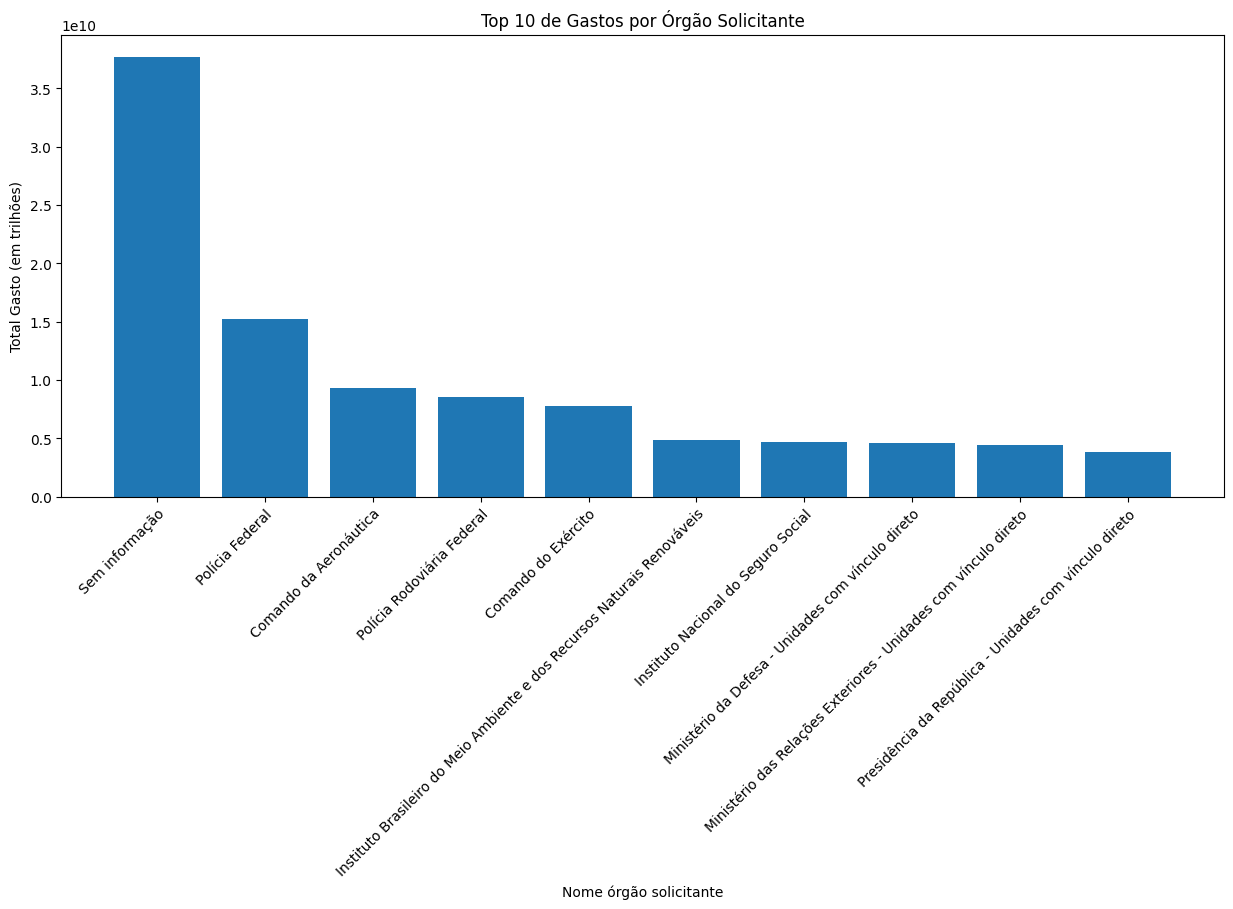

In [45]:
# prompt: a bar graph from viagem ordered by 'Nome órgão solicitante' with sum of 'Valor diárias' + 'Valor passagens' + 'Valor outros gastos' - 'Valor devolução'
import pandas as pd
import matplotlib.pyplot as plt

for column in ['Valor diárias', 'Valor passagens', 'Valor outros gastos', 'Valor devolução']:
    viagem[column] = viagem[column].astype(str).str.replace('[^0-9.]', '', regex=True)
    viagem[column] = pd.to_numeric(viagem[column], errors='coerce')

viagem['Total Gasto'] = viagem['Valor diárias'] + viagem['Valor passagens'] + viagem['Valor outros gastos'] - viagem['Valor devolução']

gastos_por_orgao = viagem.groupby('Nome órgão solicitante')['Total Gasto'].sum().sort_values(ascending=False).head(10) #Mudar o valor para pegar mais informações

plt.figure(figsize=(15, 6))
plt.bar(gastos_por_orgao.index, gastos_por_orgao.values)
plt.xlabel('Nome órgão solicitante')
plt.ylabel('Total Gasto (em trilhões)')
plt.title('Top 10 de Gastos por Órgão Solicitante')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()